In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings

In [2]:
data = pd.read_csv("multiple_linear_regression.csv")

In [3]:
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Feature 3  200 non-null    float64
 3   Target     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data = data.dropna()

In [6]:
data.shape

(200, 4)

## Splitting data

In [7]:
output_col = "Target"

In [8]:
x = data.iloc[:,data.columns!=output_col]

In [9]:
y=data.loc[:,output_col]

In [10]:
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size = 0.30, random_state = 43)

In [11]:
x_train

,Feature 1,Feature 2,Feature 3
71,109.8,14.3,31.7
90,134.3,4.9,9.3
100,222.4,4.3,49.8
44,25.1,25.7,43.3
94,107.4,14.0,10.9
...,...,...,...
58,210.8,49.6,37.7
21,237.4,5.1,23.5
49,66.9,11.7,36.8
64,131.1,42.8,28.9


# Linear Regression with OLS Summary

In [13]:
x_with_constant = sm.add_constant(x_train)

In [14]:
x_with_constant

,const,Feature 1,Feature 2,Feature 3
71,1.0,109.8,14.3,31.7
90,1.0,134.3,4.9,9.3
100,1.0,222.4,4.3,49.8
44,1.0,25.1,25.7,43.3
94,1.0,107.4,14.0,10.9
...,...,...,...,...
58,1.0,210.8,49.6,37.7
21,1.0,237.4,5.1,23.5
49,1.0,66.9,11.7,36.8
64,1.0,131.1,42.8,28.9


In [15]:
model = sm.OLS(y_train,x_with_constant)

In [16]:
result = model.fit()

In [17]:
result.params

const        3.077774
Feature 1    0.045978
Feature 2    0.180929
Feature 3   -0.001942
dtype: float64

In [19]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     346.9
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           1.67e-63
Time:                        18:43:22   Log-Likelihood:                -276.47
No. Observations:                 140   AIC:                             560.9
Df Residuals:                     136   BIC:                             572.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0778      0.398      7.735      0.0

In [20]:
x_test = sm.add_constant(x_test)

In [21]:
y_pred = result.predict(x_test)

In [22]:
residual = y_test - y_pred

In [23]:
residual

56    -2.917101
37    -0.661461
67     1.313807
79     1.240469
80     0.422008
188   -2.835263
183    2.258416
10     1.480683
128    2.633938
62    -1.131729
65     1.368841
17     1.327562
133    0.442702
195    2.123225
146   -2.221023
38     0.277943
173   -0.380236
149    0.339051
93     1.122823
29     1.360550
0      1.737942
2     -2.738627
122   -2.180821
180   -0.232255
95     0.699385
121   -0.770427
185    1.974879
39     1.180337
66     0.527340
19     0.462538
11     0.116186
45    -0.238272
41    -0.083768
92     0.366254
168   -0.039522
1     -1.746705
57     0.418405
189    0.618645
151    1.533650
167   -1.289216
116    0.184502
138   -0.101073
155   -2.153987
82     1.150338
160    0.175804
181   -1.847809
171    0.169465
12    -1.194657
55     2.655820
77     0.452965
22    -0.865117
129    1.794492
105    1.501334
102   -2.946682
159    0.505011
9     -2.093458
15     1.810533
150   -2.326901
76     2.308544
119   -0.221298
dtype: float64

# <font color="green"> Linear Model Assumptions</font>

## Homoscedesticity

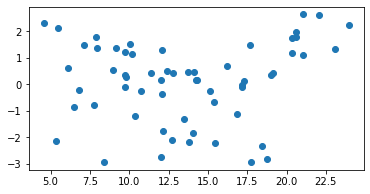

In [29]:
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(y_pred, residual)

## Normality of Residuals 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

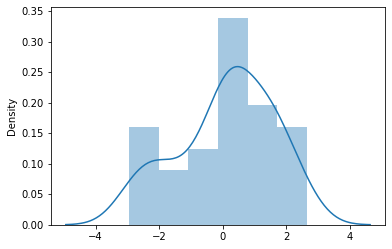

In [32]:
sns.distplot(residual)

In [33]:
np.mean(residual)

0.11398299824531118